In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
corneal = pd.read_csv('corneal.csv')
irritation = pd.read_csv('irritation.csv')
melanin = pd.read_csv('melanin.csv')
#cox2 = pd.read_pdb('COX-2.pdb')
display(corneal)


,SMILES,logPerm
0,CC1CC2C3CCC(C3(CC(C2(C4(C1=CC(=O)C=C4)C)F)O)C)...,5.135798
1,CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)O,5.347108
2,CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)N,5.393628
3,C(C(CO)O)O,3.806662
4,CC12CCC(=O)C=C1CCC3C2C(CC4(C3CCC4(C(=O)CO)O)C)O,4.442651
...,...,...
115,C1CN2C(=CC=C2C(=O)C3=CC=CC=C3)C1C(=O)O,1.249902
116,CC1CN(CCC1(C2=CC=CC=C2)C(=O)O)C3CCC(CC3)(C#N)C...,1.406097
117,COC1=CC2=C(C=CN=C2C=C1)C(C3CC4CCN3CC4C=C)O,2.161022
118,C1CN=C(N1)NC2=C(C=CC3=NSN=C32)Cl,3.850998


In [41]:
corneal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SMILES   120 non-null    object 
 1   logPerm  120 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [42]:
import pandas as pd
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors

# Функция для получения молекулярных дескрипторов
def get_molecular_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [None] * len(descriptor_names)  # Возвращаем None для всех дескрипторов, если SMILES некорректен
    descriptors = descriptor_calculator.CalcDescriptors(mol)
    return descriptors

# Предполагаем, что ваш DataFrame уже загружен и называется melanin
# Получаем список доступных дескрипторов
descriptor_names = [desc[0] for desc in Chem.Descriptors._descList]  # Извлекаем только имена дескрипторов
descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

# Применяем функцию к столбцу SMILES и создаем новый DataFrame с дескрипторами
descriptors_df = corneal['SMILES'].apply(get_molecular_descriptors).apply(pd.Series)

# Переименовываем столбцы дескрипторов
descriptors_df.columns = descriptor_names

# Объединяем оригинальный DataFrame с новыми дескрипторами
result_df = pd.concat([corneal, descriptors_df], axis=1)

# Сохраняем результат в новый CSV файл
result_df.to_csv('corneal_with_descriptors.csv', index=False)

print("Дескрипторы успешно извлечены и сохранены в 'corneal_with_descriptors.csv'.")

Дескрипторы успешно извлечены и сохранены в 'corneal_with_descriptors.csv'.


In [45]:
result_df = result_df.drop(['SMILES'], axis=1)
result_df = result_df.dropna()
print(result_df)


      logPerm  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0    5.135798          16.872814       16.872814           0.001532   
1    5.347108          13.966636       13.966636           0.396481   
2    5.393628          14.007453       14.007453           0.340926   
3    3.806662           8.166667        8.166667           0.364583   
4    4.442651          12.361571       12.361571           0.069679   
..        ...                ...             ...                ...   
115  1.249902          12.375394       12.375394           0.057510   
116  1.406097          13.334976       13.334976           0.013056   
117  2.161022          11.151855       11.151855           0.177547   
118  3.850998           6.130141        6.130141           0.621852   
119  3.455686          14.379224       14.379224           0.095981   

     MinEStateIndex       qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0         -1.921866  0.737909  54.037037  376.468         347.236 

In [51]:
corneal_with_descriptors = pd.read_csv('C:\Хакатон_сбер\corneal_with_descriptors.csv')
corneal_with_descriptors.drop(['SMILES'], axis=1, inplace=True)
corneal_with_descriptors.dropna()

,logPerm,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,5.135798,16.872814,16.872814,0.001532,-1.921866,0.737909,54.037037,376.468,347.236,376.204988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.347108,13.966636,13.966636,0.396481,-0.956610,0.893750,12.111111,244.265,231.161,244.089958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.393628,14.007453,14.007453,0.340926,-0.482108,0.884029,12.111111,243.281,229.169,243.105942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.806662,8.166667,8.166667,0.364583,-0.953704,0.381494,10.000000,92.094,84.030,92.047344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.442651,12.361571,12.361571,0.069679,-1.543732,0.696016,50.500000,362.466,332.226,362.209324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.249902,12.375394,12.375394,0.057510,-0.823555,0.855919,17.157895,255.273,242.169,255.089543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,1.406097,13.334976,13.334976,0.013056,-0.850247,0.764577,31.645161,420.528,391.296,420.221306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,2.161022,11.151855,11.151855,0.177547,-0.503545,0.877602,30.250000,324.424,300.232,324.183778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,3.850998,6.130141,6.130141,0.621852,0.621852,0.812404,14.937500,253.718,245.654,253.018894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
corneal_with_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Columns: 218 entries, logPerm to fr_urea
dtypes: float64(218)
memory usage: 204.5 KB


In [55]:
sum(corneal_with_descriptors.isnull().sum())

0

In [59]:
print(f"Количество дубликатов: {corneal_with_descriptors.duplicated().sum()}")
corneal_with_descriptors[corneal_with_descriptors.duplicated(keep=False)]

Количество дубликатов: 0


,logPerm,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea


In [35]:
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis= 1)
    return df[indices_to_keep].astype(np.float64)

corneal_with_descriptors = clean_dataset(corneal_with_descriptors)

In [36]:
# Вычисляем третий квартиль для каждого столбца
q3 = corneal_with_descriptors.quantile(0.75)

# Отбираем только те столбцы, где Q3 > 0
filtered_melanin_with_descriptors = corneal_with_descriptors.loc[:, q3 > 0]

In [37]:
corneal_with_descriptors.describe()
clean_dataset(corneal_with_descriptors)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,logPerm,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,5.135798,16.872814,16.872814,0.001532,-1.921866,0.737909,54.037037,376.468,347.236,376.204988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.347108,13.966636,13.966636,0.396481,-0.956610,0.893750,12.111111,244.265,231.161,244.089958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.393628,14.007453,14.007453,0.340926,-0.482108,0.884029,12.111111,243.281,229.169,243.105942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.806662,8.166667,8.166667,0.364583,-0.953704,0.381494,10.000000,92.094,84.030,92.047344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.442651,12.361571,12.361571,0.069679,-1.543732,0.696016,50.500000,362.466,332.226,362.209324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.249902,12.375394,12.375394,0.057510,-0.823555,0.855919,17.157895,255.273,242.169,255.089543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,1.406097,13.334976,13.334976,0.013056,-0.850247,0.764577,31.645161,420.528,391.296,420.221306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,2.161022,11.151855,11.151855,0.177547,-0.503545,0.877602,30.250000,324.424,300.232,324.183778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,3.850998,6.130141,6.130141,0.621852,0.621852,0.812404,14.937500,253.718,245.654,253.018894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
np.all(np.isfinite(corneal_with_descriptors))


True

In [57]:
np.any(np.isnan(corneal_with_descriptors))

False

In [12]:
corneal_with_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Columns: 218 entries, logPerm to fr_urea
dtypes: float64(218)
memory usage: 204.5 KB


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Загрузка данных

corneal_with_descriptors.head()
# Разделение на признаки и целевую переменную
X = corneal_with_descriptors.drop(['logPerm'], axis=1)
y = corneal_with_descriptors['logPerm']


# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Удаление строк с NaN или inf
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
y_train = y_train[X_train.index]  # Обновляем y_train, чтобы он соответствовал X_train

X_test = X_test.replace([np.inf, -np.inf], np.nan).dropna()
y_test = y_test[X_test.index]  # Обновляем y_test, чтобы он соответствовал X_test
# Обучение модели
lr = LinearRegression()
lr.fit(X_train, y_train)

# Оценка модели
y_pred = lr.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2 Score: -0.0001023175897409967
MSE: 2.5178933608061818


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = corneal_with_descriptors.drop(['logPerm'], axis=1)
y = corneal_with_descriptors['logPerm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R2: {r2}')

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py:2153: RuntimeWarning: overflow encountered in cast
  arr = np.asarray(values, dtype=dtype)


ValueError: Input X contains infinity or a value too large for dtype('float32').

In [69]:
importances = model.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def smiles_to_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'LogP': Descriptors.MolLogP(mol),
        'NumHDonors': Descriptors.NumHDonors(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
    }
    return descriptors

data['descriptors'] = data['SMILES'].apply(smiles_to_descriptors)
descriptors_df = pd.json_normalize(data['descriptors'])
data = pd.concat([data, descriptors_df], axis=1)

# Подготовка данных
X = data.drop(['SMILES', 'logPerm', 'descriptors'], axis=1)
y = data['logPerm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R2: {r2}')

# Важность признаков
importances = model.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

MSE: 1.4342984984816705, R2: 0.4302994420749725
             feature  importance
1               LogP    0.594256
0              MolWt    0.197352
4  NumRotatableBonds    0.085039
3      NumHAcceptors    0.079561
2         NumHDonors    0.043792


In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Параметры для поиска
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# Модель
rf = RandomForestRegressor(random_state=42)

# Поиск
search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)
search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", search.best_params_)
print("Лучший R² на кросс-валидации:", search.best_score_)

# Оценка на тестовых данных
best_rf = search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Тестовый R²:", r2_score(y_test, y_pred))

Лучшие параметры: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 409}
Лучший R² на кросс-валидации: 0.21507664557265277
Тестовый R²: 0.5364757420623669


In [47]:
from mordred import Calculator, descriptors

# Инициализация калькулятора
calc = Calculator(descriptors, ignore_3D=True)
mol_list = [Chem.MolFromSmiles(smi) for smi in data['SMILES']]

# Вычисление дескрипторов
mordred_features = calc.pandas(mol_list)
mordred_features = mordred_features.astype(float)

# Объединение с исходными данными
data_extended = pd.concat([data, mordred_features], axis=1)

NameError: name 'data' is not defined

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Параметры для поиска
params = {
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'n_estimators': [10, 50, 100],
    'subsample': [0.5, 0.7, 1.0],
    'max_depth': [3, 5],
    'min_samples_leaf': [1, 2]
}

# Поиск
gb = GradientBoostingRegressor(random_state=42)
grid_search = RandomizedSearchCV(gb, params, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Результаты
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший R²:", grid_search.best_score_)

Лучшие параметры: {'subsample': 1.0, 'n_estimators': 50, 'min_samples_leaf': 2, 'max_depth': 5, 'loss': 'absolute_error'}
Лучший R²: 0.1678092920167899


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Оставляем 95% дисперсии
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Обучение модели на PCA-признаках
model_pca = RandomForestRegressor(descriptors)
model_pca.fit(X_train_pca, y_train)
print("R² с PCA:", model_pca.score(X_test_pca, y_test))

R² с PCA: -0.4381010844628783


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

data = pd.read_csv('corneal_.csv')

def smiles_to_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'LogP': Descriptors.MolLogP(mol),
        'NumHDonors': Descriptors.NumHDonors(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
    }
    return descriptors

data['descriptors'] = data['SMILES'].apply(smiles_to_descriptors)
descriptors_df = pd.json_normalize(data['descriptors'])
data = pd.concat([data, descriptors_df], axis=1)

X = data.drop(['SMILES', 'logPerm', 'descriptors'], axis=1)
y = data['logPerm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100],  
    'max_depth': [3, 4, 6, 8],   
    'min_samples_split': [20, 40, 60],    
    'min_samples_leaf': [1, 2, 4]   
}

rf = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,  
    verbose=2
)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² на тестовых данных: {r2:.4f}")
print(f"MSE на тестовых данных: {mse:.4f}")

importances = best_rf.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nВажность признаков:")
print(feature_importance.head(10))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшие параметры: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 40, 'n_estimators': 10}
R² на тестовых данных: 0.5277
MSE на тестовых данных: 1.1890

Важность признаков:
             feature  importance
1               LogP    0.719076
0              MolWt    0.172569
3      NumHAcceptors    0.087639
4  NumRotatableBonds    0.020717
2         NumHDonors    0.000000


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("\nМатрица ошибок (confusion matrix):")
print(cm)


In [ ]:
from mordred import Calculator, descriptors

calc = Calculator(descriptors, ignore_3D=False)  
mols = [Chem.MolFromSmiles(smi) for smi in data['SMILES']]
mordred_features = calc.pandas(mols)

# Удаление столбцов с NaN и бесконечностями
mordred_features = mordred_features.select_dtypes(include=['number'])
mordred_features = mordred_features.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

# Объединение с исходными данными
X_extended = pd.concat([X, mordred_features], axis=1)

X_train_extended, X_test_extended, y_train_extended, y_test_extended -= train_test_split(X_extended, y, test_size=0.2, random_state=42)

  7%|▋         | 8/120 [00:24<05:45,  3.09s/it]

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 68%|██████▊   | 82/120 [00:26<00:06,  5.80it/s]

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 120/120 [00:27<00:00,  4.39it/s]


In [27]:
param_grid_extended = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 15, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', 0.5]  # Добавим долю признаков
}

grid_search_extended = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_extended,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search_extended.fit(X_extended, y)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 15, 25],
                         'max_features': ['sqrt', 'log2', 0.5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='r2')
grid_search_xgb.fit(X_extended, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='r2')

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Оставляем 95% дисперсии
X_pca = pca.fit_transform(X_extended)

In [44]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)),
    ('xgb', XGBRegressor(learning_rate=0.1, max_depth=3))
]

stacking = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV()
)
stacking.fit(X_extended, y)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                  final_estimator=RidgeCV())

<Axes: ylabel='logPerm'>

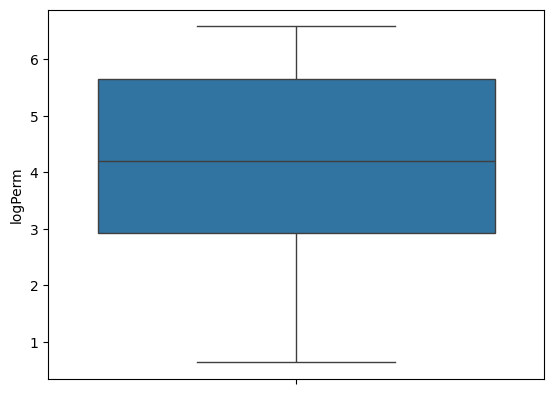

In [45]:
import seaborn as sns
sns.boxplot(data['logPerm'])